# Calcular simbólicamente la derivada de una función simple en Python usando la librería SymPy.

### 1. Cálculo simbólico de la derivada

### 2. Evaluación de la función y su derivada

### 3. Crear una tabla simple usando la librería Pandas

### 4. Graficar las funciones usando la librería Matplotlib

In [1]:
# Importar las librerías
from sympy import*
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
x, y = symbols('x y', integer = True)

In [3]:
# Definir la función
y = x**2
y

x**2

La función es $x^2$, es decir:

\begin{equation} f(x) = x^2 \end{equation}


In [4]:
# Hacer la derivada
diff(y)

2*x

La derivada de la función es $2x$, es decir:

\begin{equation} \frac{d}{dx}f(x) = 2x \end{equation}

In [5]:
# Definir los puntos donde queremos evaluar nuestra función y su derivada
puntos = np.linspace(-10,10,20)
puntos

array([-10.        ,  -8.94736842,  -7.89473684,  -6.84210526,
        -5.78947368,  -4.73684211,  -3.68421053,  -2.63157895,
        -1.57894737,  -0.52631579,   0.52631579,   1.57894737,
         2.63157895,   3.68421053,   4.73684211,   5.78947368,
         6.84210526,   7.89473684,   8.94736842,  10.        ])

In [6]:
# Evaluar la función 
f1 = lambdify(x,y, 'numpy')        # Nos da valores float
f1(puntos)

array([100.        ,  80.05540166,  62.32686981,  46.81440443,
        33.51800554,  22.43767313,  13.5734072 ,   6.92520776,
         2.49307479,   0.27700831,   0.27700831,   2.49307479,
         6.92520776,  13.5734072 ,  22.43767313,  33.51800554,
        46.81440443,  62.32686981,  80.05540166, 100.        ])

In [8]:
# Evaluar la derivada
f2 = lambdify(x, diff(y), 'numpy')    # Nos da valores float
f2(puntos)

array([-20.        , -17.89473684, -15.78947368, -13.68421053,
       -11.57894737,  -9.47368421,  -7.36842105,  -5.26315789,
        -3.15789474,  -1.05263158,   1.05263158,   3.15789474,
         5.26315789,   7.36842105,   9.47368421,  11.57894737,
        13.68421053,  15.78947368,  17.89473684,  20.        ])

In [11]:
k1 = f1(puntos)
k2 = f2(puntos)
columna1 = [int(k1[i]) for i in range(len(puntos))]
columna2 = [int(k2[i]) for i in range(len(puntos))]
print(columna1)
print(type(columna1))
print(columna2)
print(type(columna2))

[100, 80, 62, 46, 33, 22, 13, 6, 2, 0, 0, 2, 6, 13, 22, 33, 46, 62, 80, 100]
<class 'list'>
[-20, -17, -15, -13, -11, -9, -7, -5, -3, -1, 1, 3, 5, 7, 9, 11, 13, 15, 17, 20]
<class 'list'>


In [12]:
for x, y in zip(columna1, columna2):
    tabla1 = '{:2d} {:4d}'.format(x,y)
    print(tabla1)

100  -20
80  -17
62  -15
46  -13
33  -11
22   -9
13   -7
 6   -5
 2   -3
 0   -1
 0    1
 2    3
 6    5
13    7
22    9
33   11
46   13
62   15
80   17
100   20


In [13]:
d = {'col1': columna1, 'col2': columna2}
df = pd.DataFrame(data = d)
df.columns = ['x','y']
df

,x,y
0,100,-20
1,80,-17
2,62,-15
3,46,-13
4,33,-11
5,22,-9
6,13,-7
7,6,-5
8,2,-3
9,0,-1


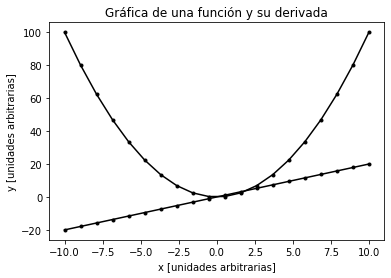

In [15]:
# Gráficas
plt.plot(puntos, f1(puntos), '-k.')
plt.plot(puntos, f2(puntos), '-k.')
plt.xlabel('x [unidades arbitrarias]')
plt.ylabel('y [unidades arbitrarias]')
plt.title('Gráfica de una función y su derivada')
plt.show()

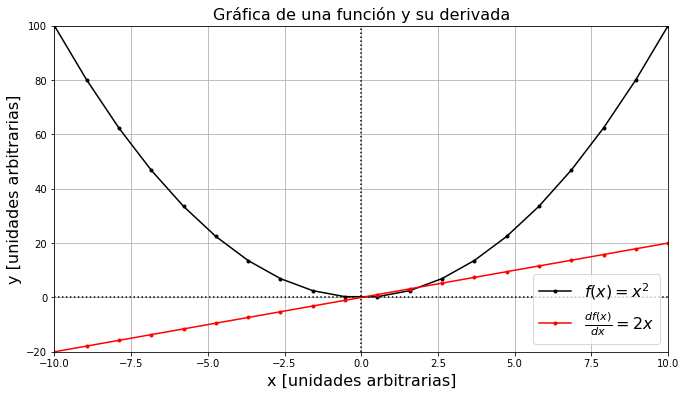

In [19]:
nombre = [r'$f(x) = x^2$',r'$\frac{df(x)}{dx} = 2x$']
plt.figure(figsize = (11,6))
plt.plot(puntos, f1(puntos), '-k.', label = r'%s'%nombre[0])
plt.plot(puntos, f2(puntos), '-r.', label = r'%s'%nombre[1])
plt.hlines(0,-10,10,colors = 'k', linestyles = 'dotted')
plt.vlines(0,-20,100,colors = 'k', linestyles = 'dotted')
plt.xlabel('x [unidades arbitrarias]', fontsize = 16)
plt.ylabel('y [unidades arbitrarias]', fontsize = 16)
plt.title('Gráfica de una función y su derivada', fontsize = 16)
plt.xlim(-10,10)
plt.ylim(-20,100)
plt.legend(loc='best', fontsize = 16)
plt.grid()
plt.show()

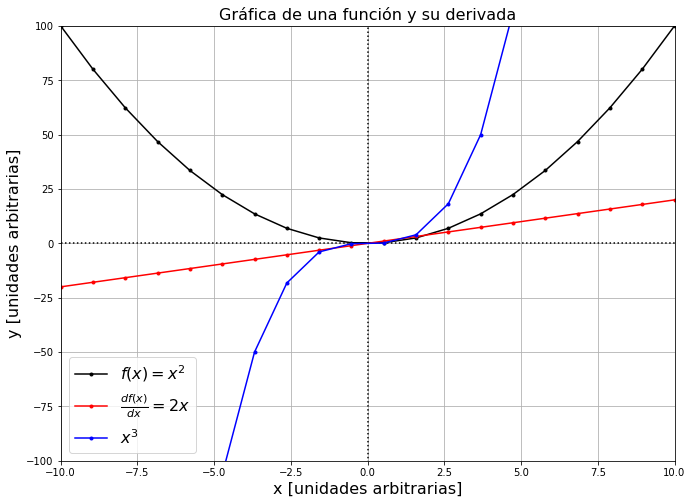

In [21]:
nombre = [r'$f(x) = x^2$',r'$\frac{df(x)}{dx} = 2x$','$x^3$']
plt.figure(figsize = (11,8))
plt.plot(puntos, f1(puntos), '-k.', label = r'%s'%nombre[0])
plt.plot(puntos, f2(puntos), '-r.', label = r'%s'%nombre[1])
plt.plot(puntos, puntos**3, '-b.', label = r'%s'%nombre[2])
plt.hlines(0,-10,10,colors = 'k', linestyles = 'dotted')
plt.vlines(0,-1000,100,colors = 'k', linestyles = 'dotted')
plt.xlabel('x [unidades arbitrarias]', fontsize = 16)
plt.ylabel('y [unidades arbitrarias]', fontsize = 16)
plt.title('Gráfica de una función y su derivada', fontsize = 16)
plt.xlim(-10,10)
plt.ylim(-100,100)
plt.legend(loc='best', fontsize = 16)
plt.grid()
plt.show()